In [102]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
df = pd.read_csv('churn prediction.csv')
df.drop('customerID',axis = 'columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [13]:
df.shape

(7043, 20)

In [14]:
no_churn = df[df['Churn']=='No'].tenure
yes_churn = df[df['Churn']=='Yes'].tenure

Text(0, 0.5, 'No. of Customers')

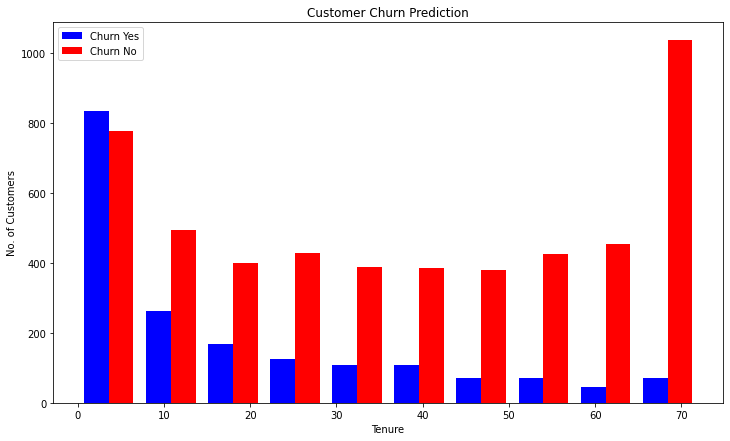

In [15]:
plt.figure(figsize=(12,7))
plt.hist([yes_churn,no_churn],color=['blue','red'])
plt.legend(labels=['Churn Yes','Churn No'])
plt.title('Customer Churn Prediction')
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')

In [16]:
no_churn_monthly = df[df['Churn']=='No'].MonthlyCharges
yes_churn_monthly = df[df['Churn']=='Yes'].MonthlyCharges

Text(0, 0.5, 'No. of Customers')

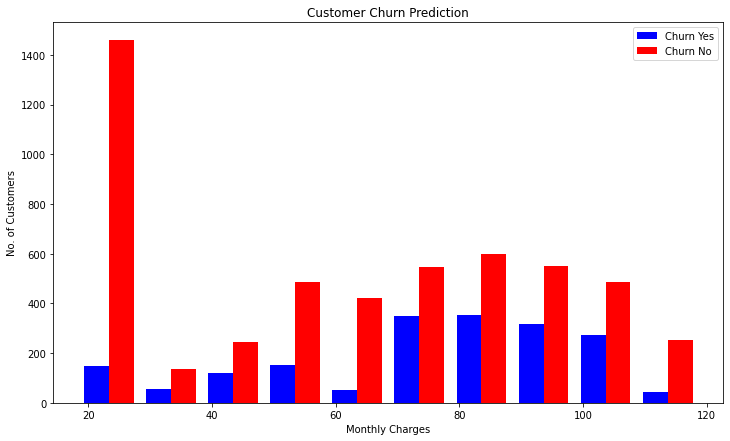

In [17]:
plt.figure(figsize=(12,7))
plt.hist([yes_churn_monthly,no_churn_monthly],color=['blue','red'])
plt.legend(labels=['Churn Yes','Churn No'])
plt.title('Customer Churn Prediction')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')

In [18]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df.Churn.replace({1:'Yes',0:'No'},inplace=True)
df.Churn.replace({'No':'Yes','Yes':'No'},inplace=True)

In [20]:
df['churn'] = df.Churn.replace({'Yes':1,'No':0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,Yes,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,No,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Yes,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,No,0


In [21]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
churn                0
dtype: int64

In [22]:
df1 = df.dropna()

In [23]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
churn               0
dtype: int64

Text(0.5, 1.0, 'Churn yes and no')

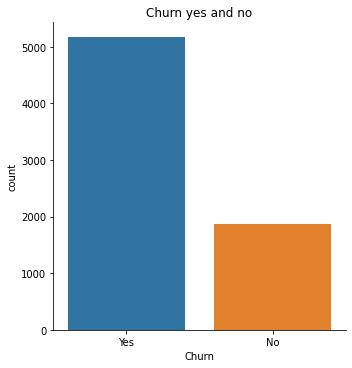

In [24]:
sns.catplot(x='Churn',kind='count',data=df)
plt.title('Churn yes and no')

In [25]:
former = df[df['Churn']=='Yes']
current = df[df['Churn']=='No']
print(len(former))

5174


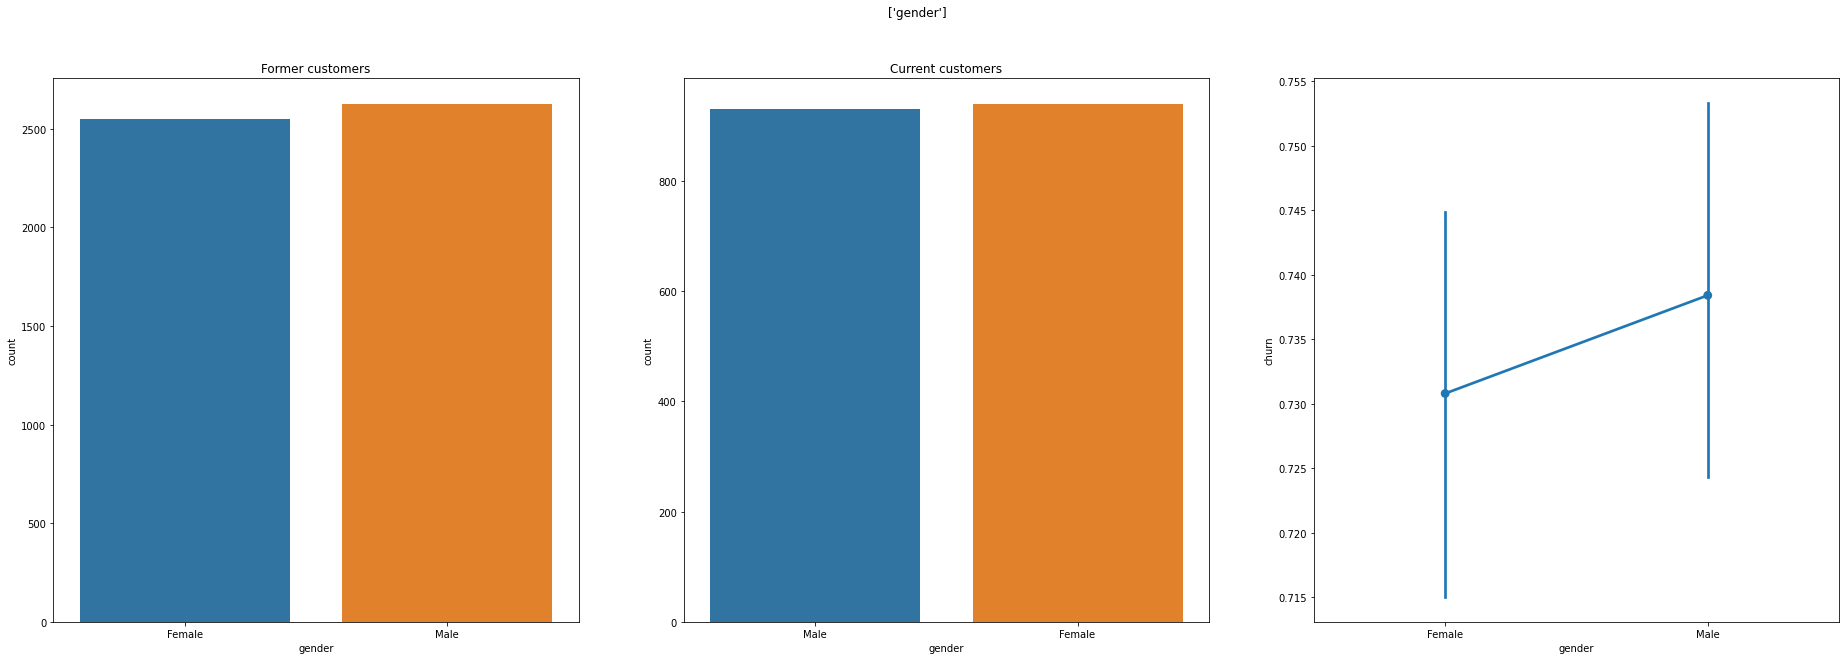

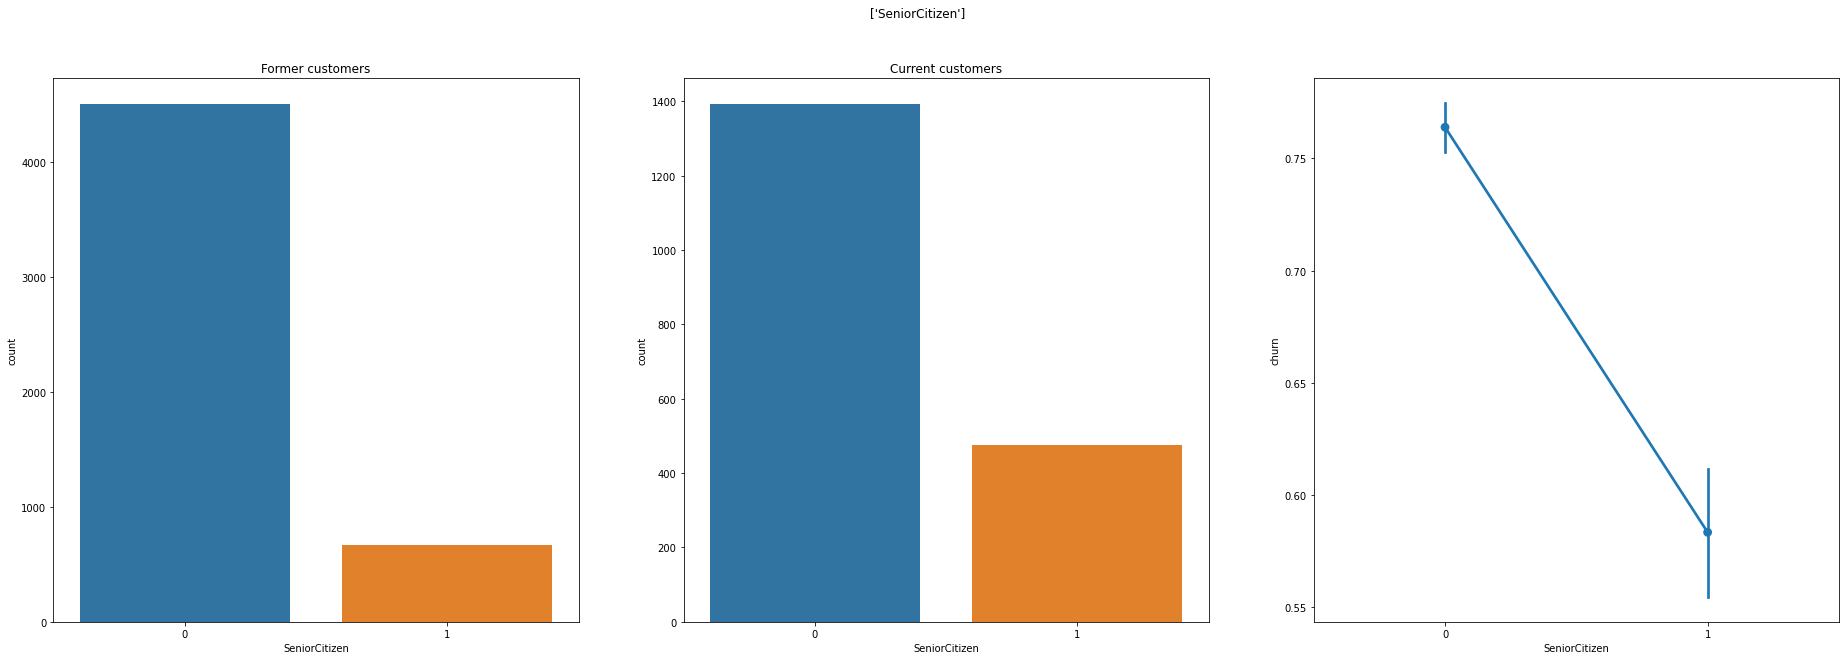

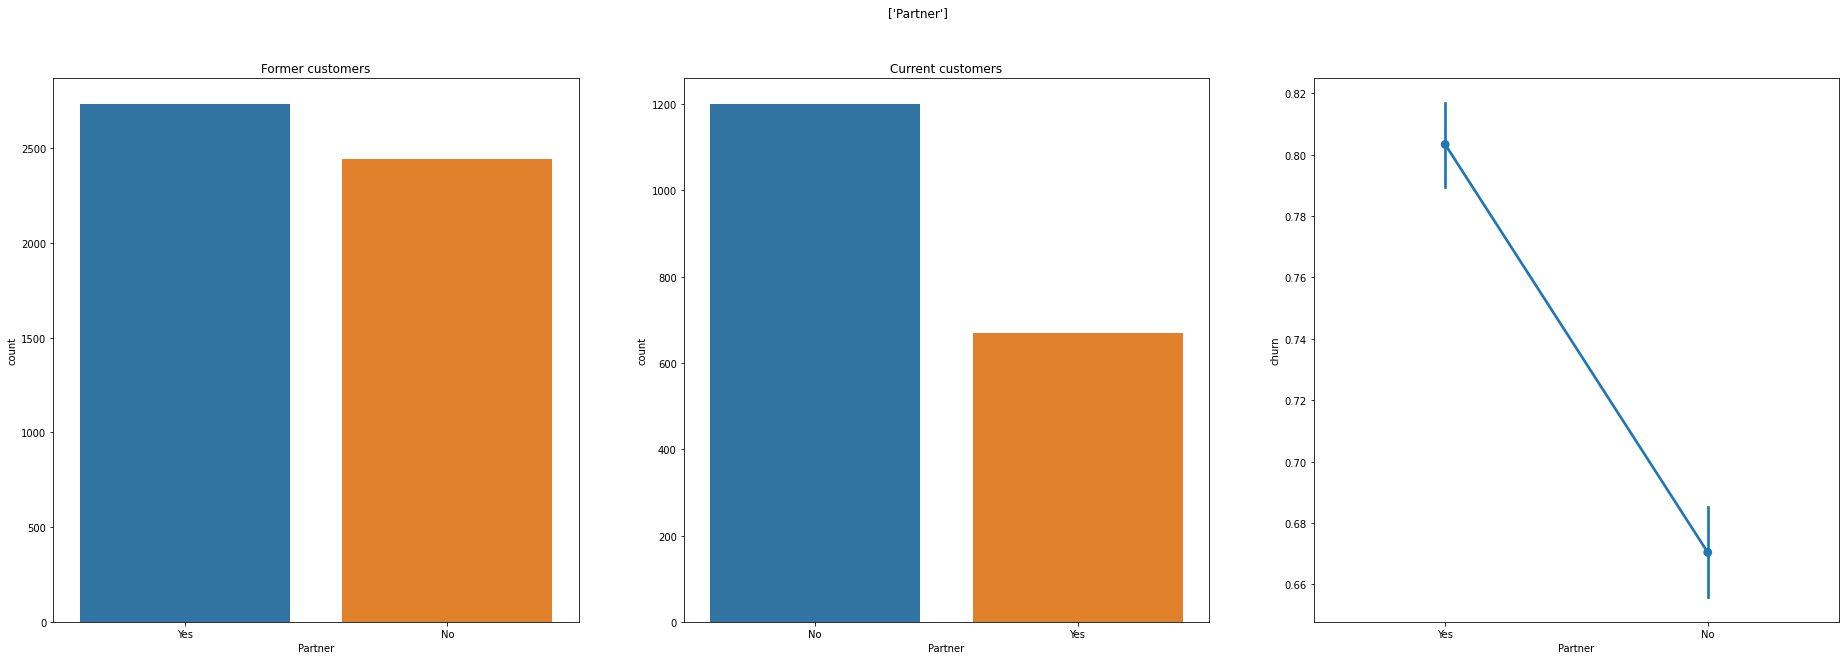

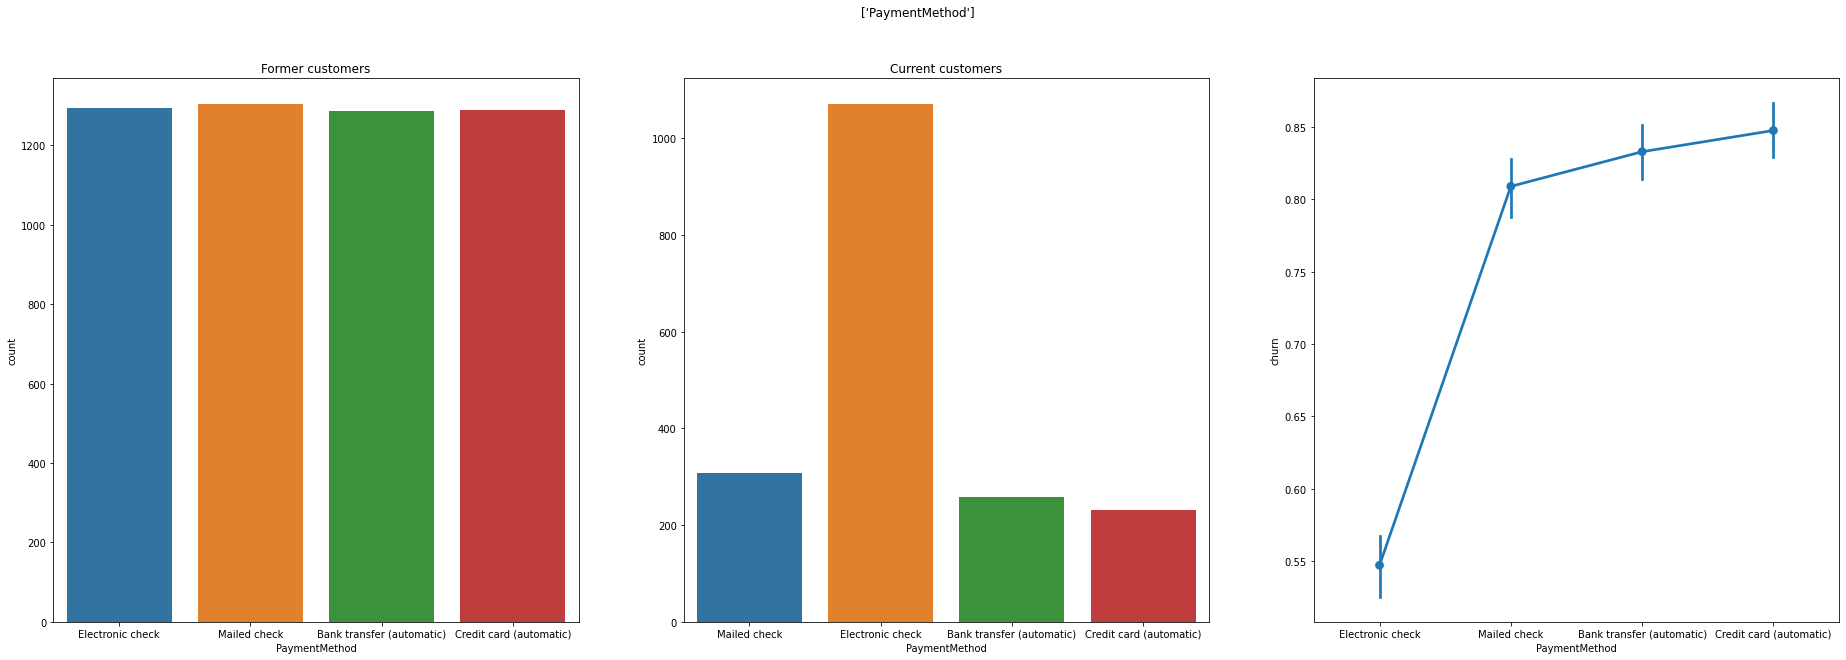

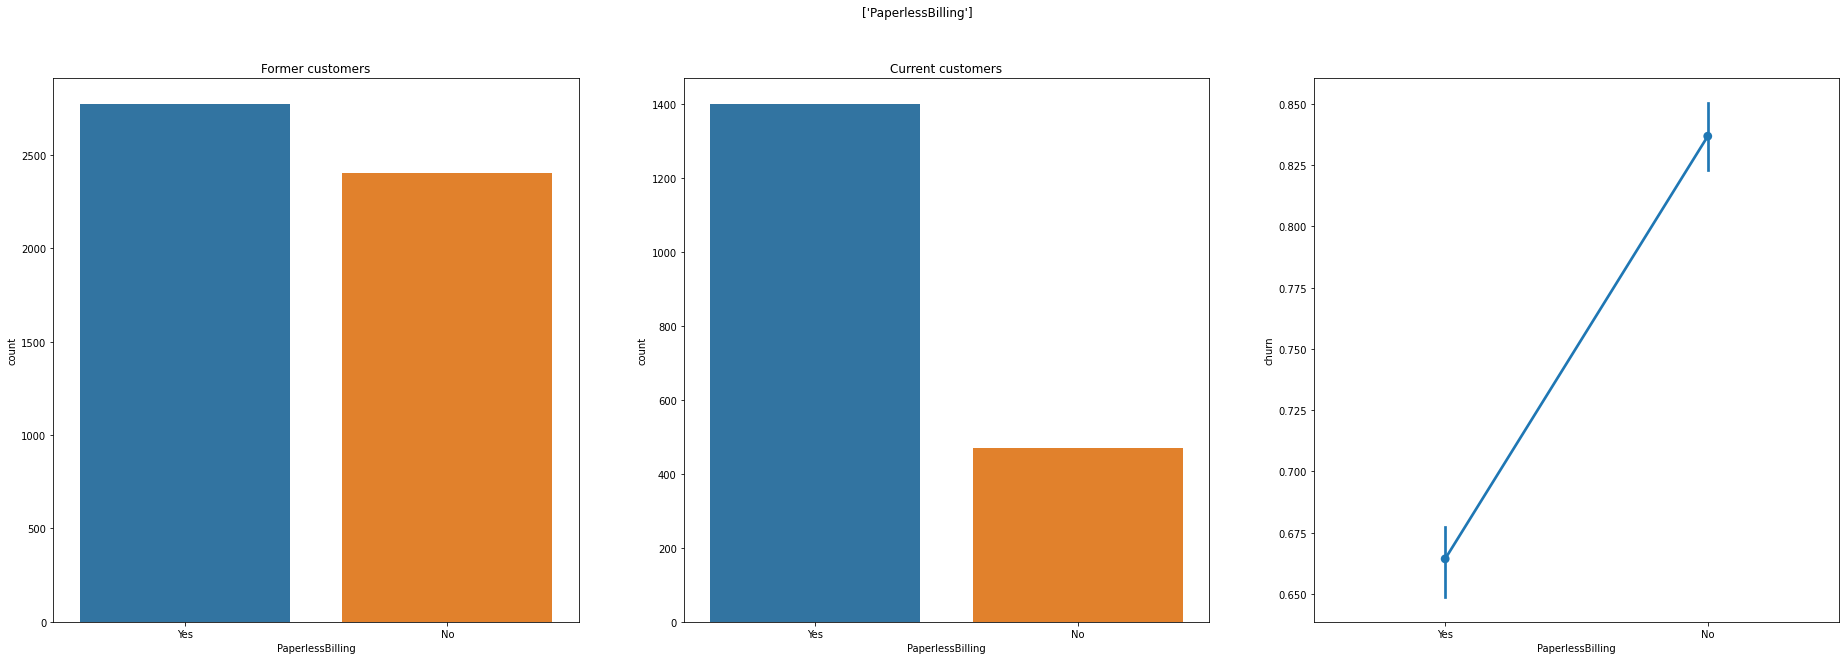

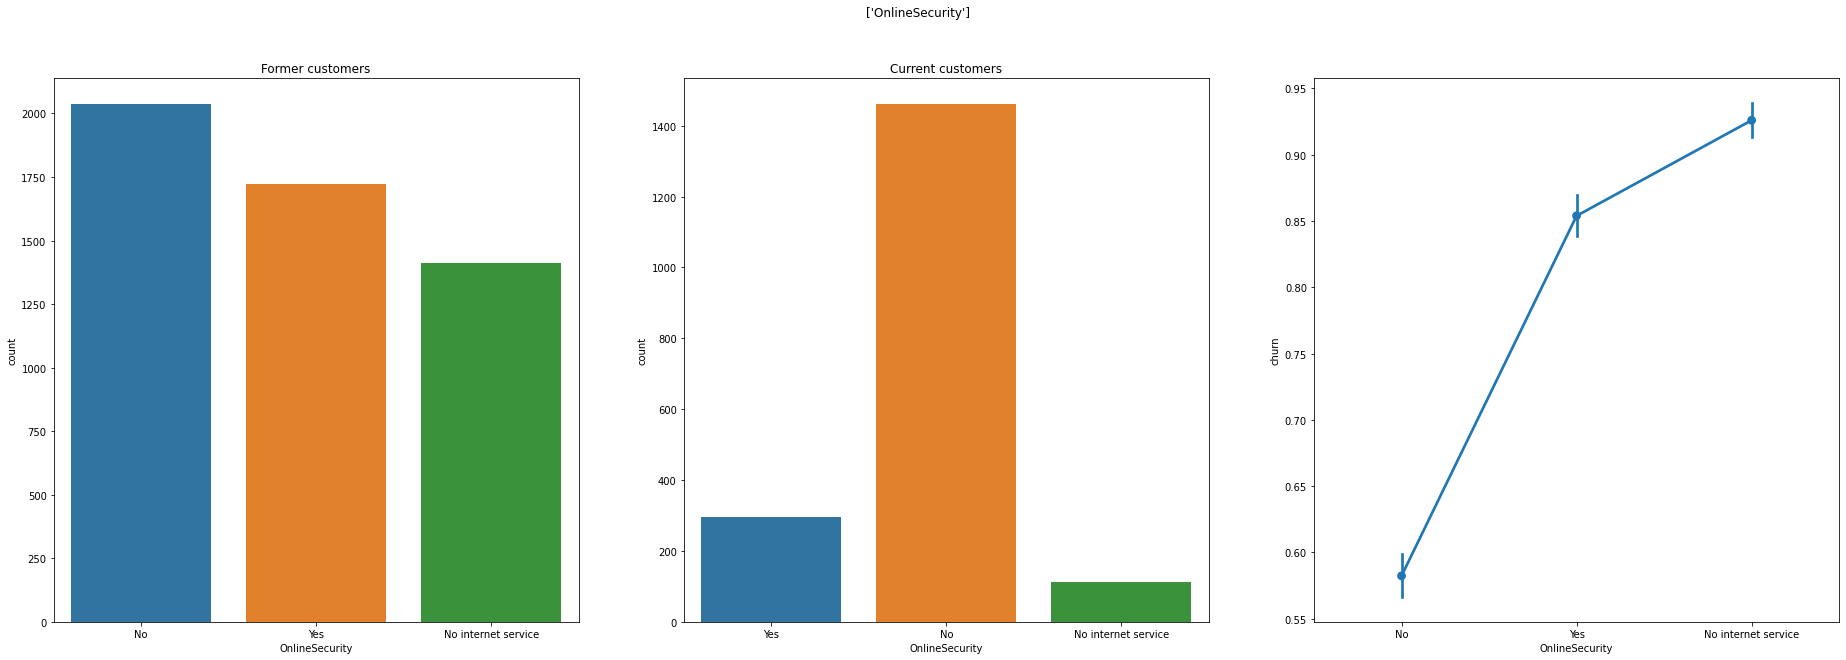

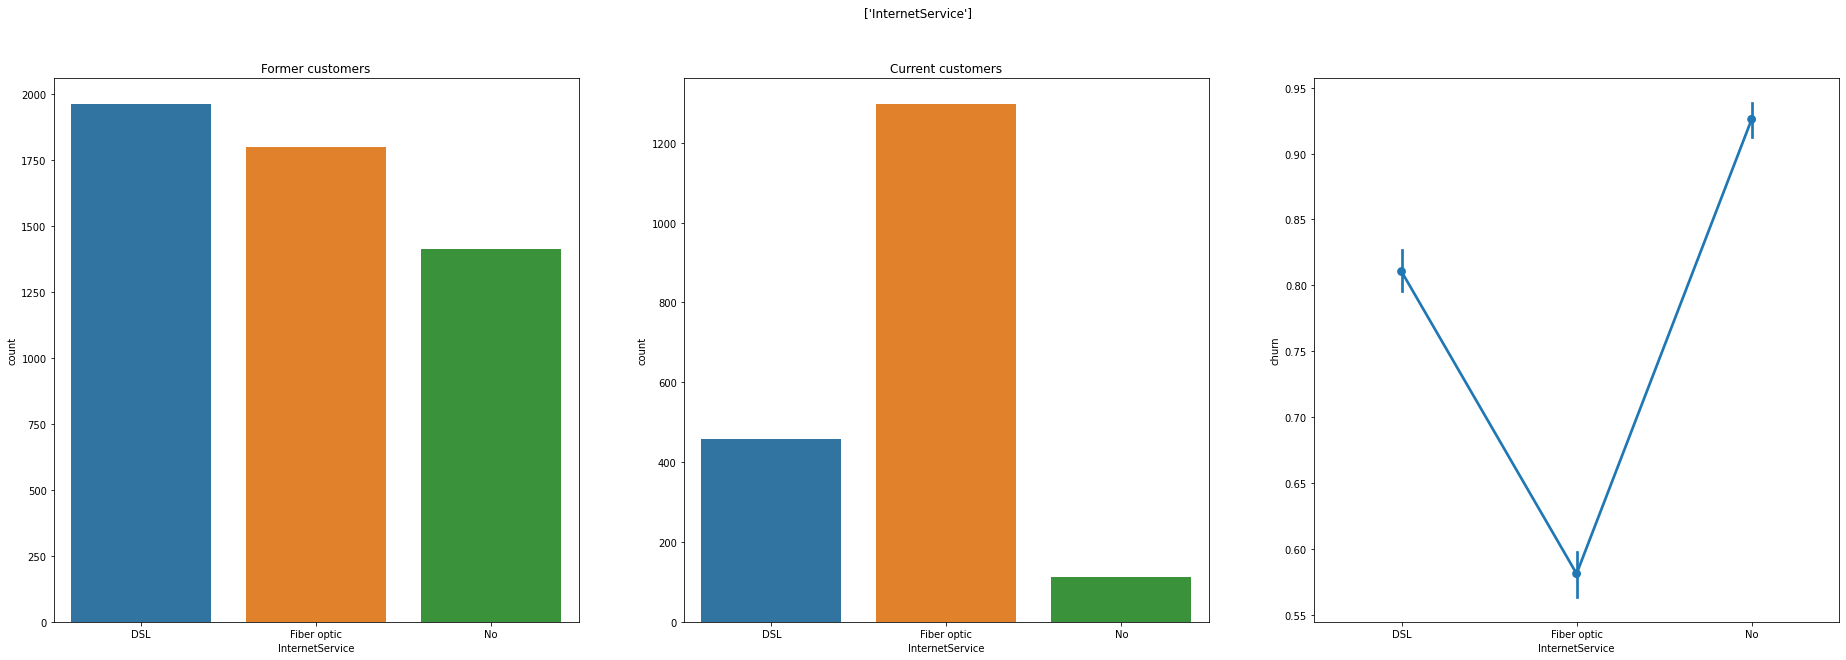

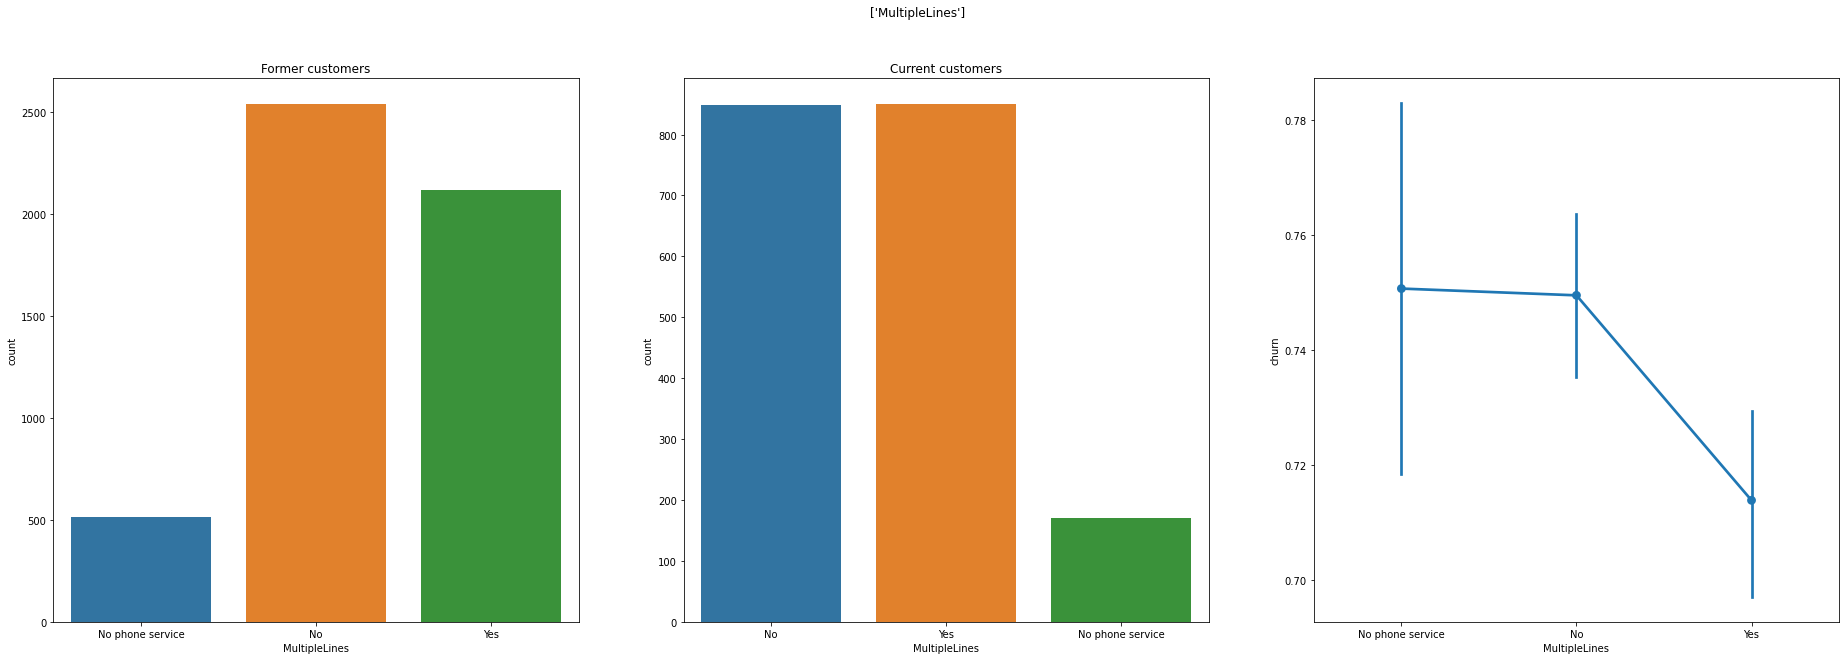

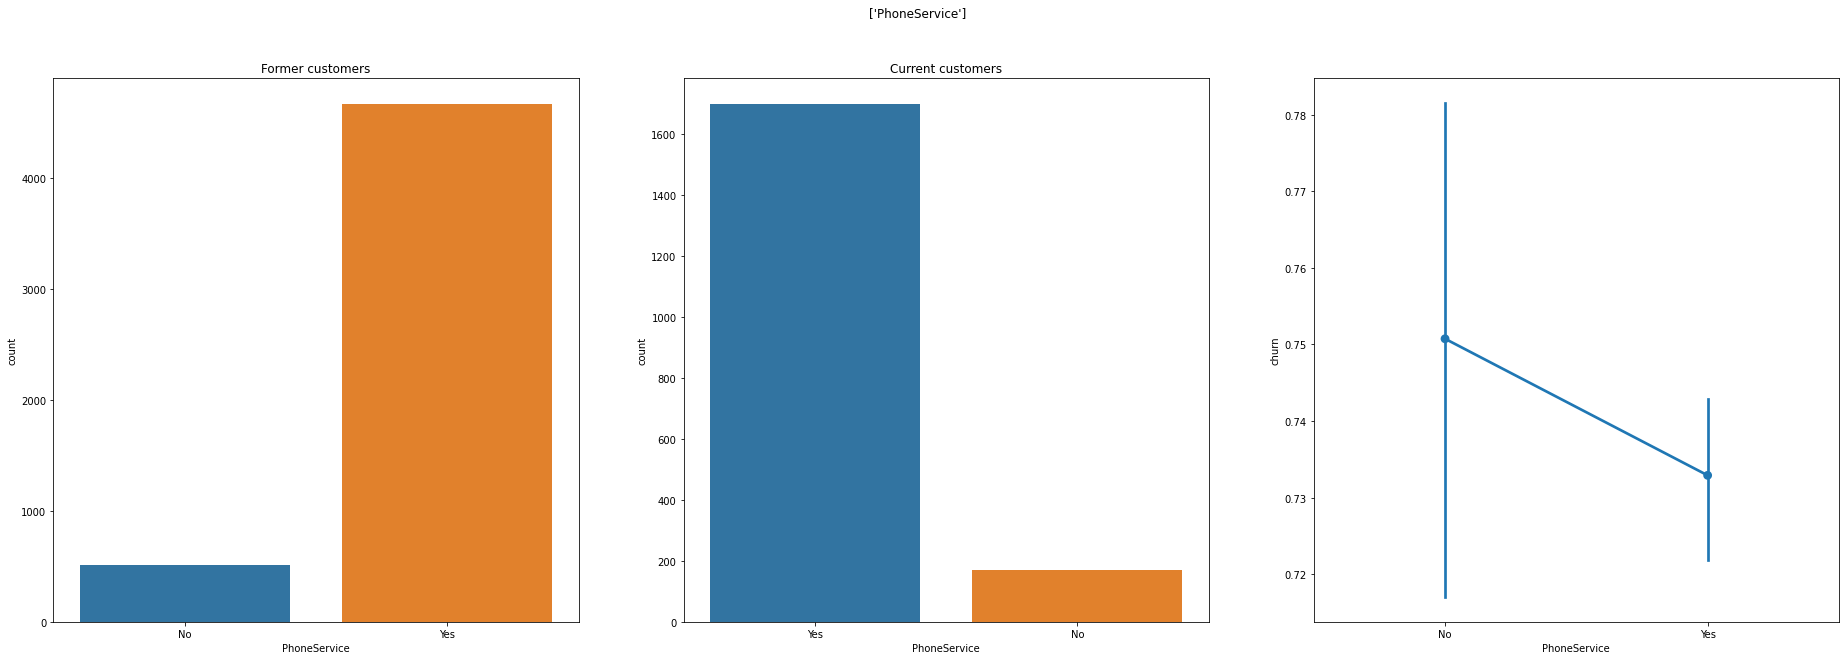

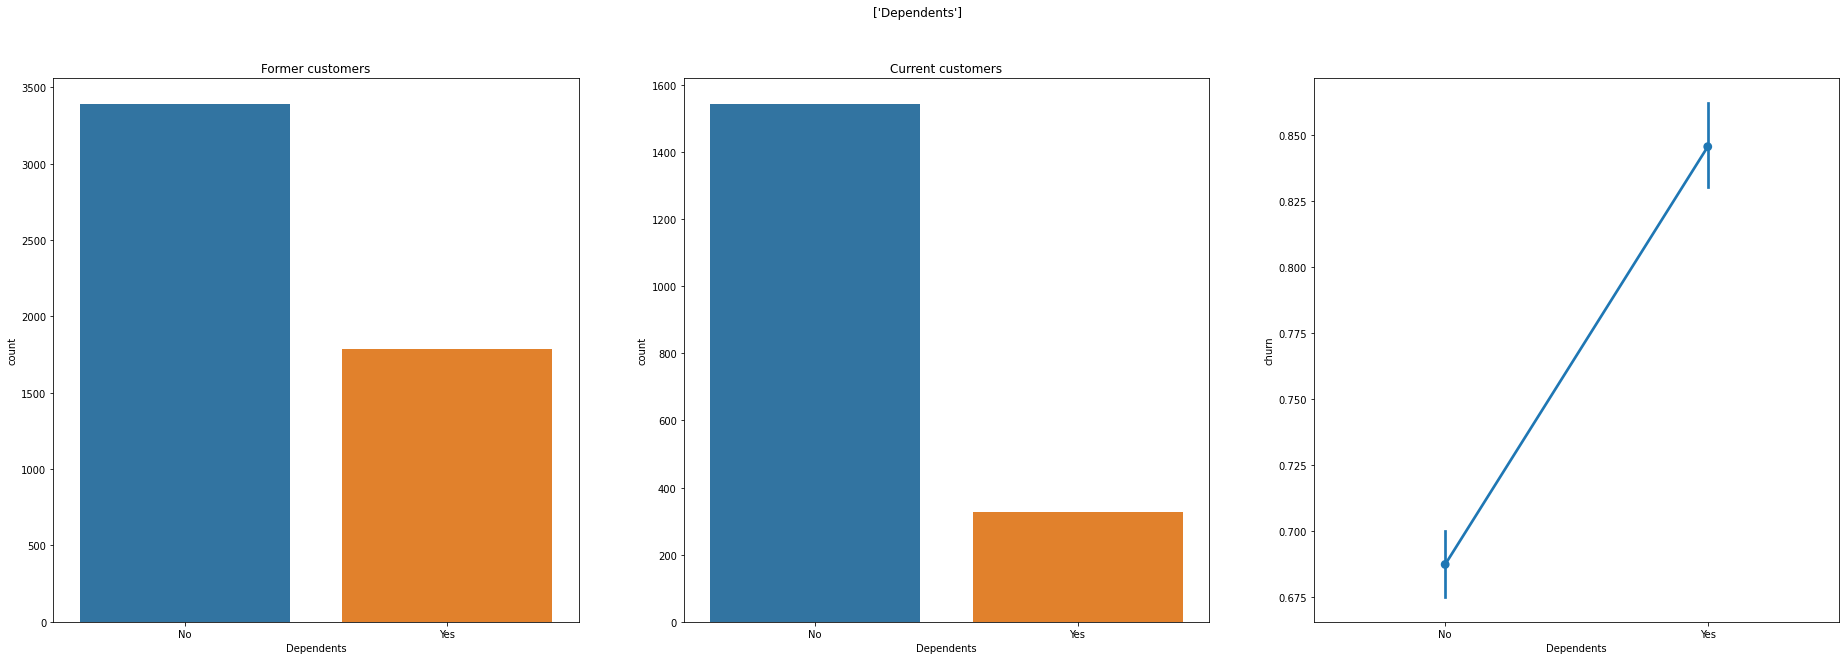

In [26]:
visualize = ['gender','SeniorCitizen','Partner','PaymentMethod','PaperlessBilling','OnlineSecurity','InternetService',
            'MultipleLines','PhoneService','Dependents']
for columns in visualize:
    fig,axis=plt.subplots(1,3,figsize=(32,10))
    plt.suptitle([columns])
    sns.countplot(ax=axis[0],x=former[columns],data=former).set(title='Former customers')
    sns.countplot(ax=axis[1],x=current[columns],data=current).set(title='Current customers')
    sns.pointplot(ax=axis[2],x=columns,y='churn',data=df)

In [27]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
churn                 int64
dtype: object

In [28]:
def datatypes_of_columns(df):
    for columns in df1:
        if df1[columns].dtypes == 'object':
            print(f'{columns} : {df1[columns].unique()}')

In [29]:
datatypes_of_columns(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['Yes' 'No']


In [30]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

In [31]:
datatypes_of_columns(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['Yes' 'No']


In [32]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for columns in yes_no_columns:
    df1.replace({'Yes':0,'No':1},inplace=True)
    df1.replace({'Female':0,'Male':1},inplace=True)

In [33]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,0,0,0,1,1,1,1,DSL,1,0,...,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,0,1
1,1,0,1,1,34,0,1,DSL,0,1,...,1,1,1,One year,1,Mailed check,56.95,1889.50,0,1
2,1,0,1,1,2,0,1,DSL,0,0,...,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,1,0
3,1,0,1,1,45,1,1,DSL,0,1,...,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,0,1
4,0,0,1,1,2,0,1,Fiber optic,1,1,...,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,1,0


In [34]:
datatypes_of_columns(df1)

InternetService : ['DSL' 'Fiber optic' 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [35]:
df2 = pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
churn                                        int64
InternetService_1                            uint8
InternetService_DSL            

In [37]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
df2[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


<AxesSubplot:>

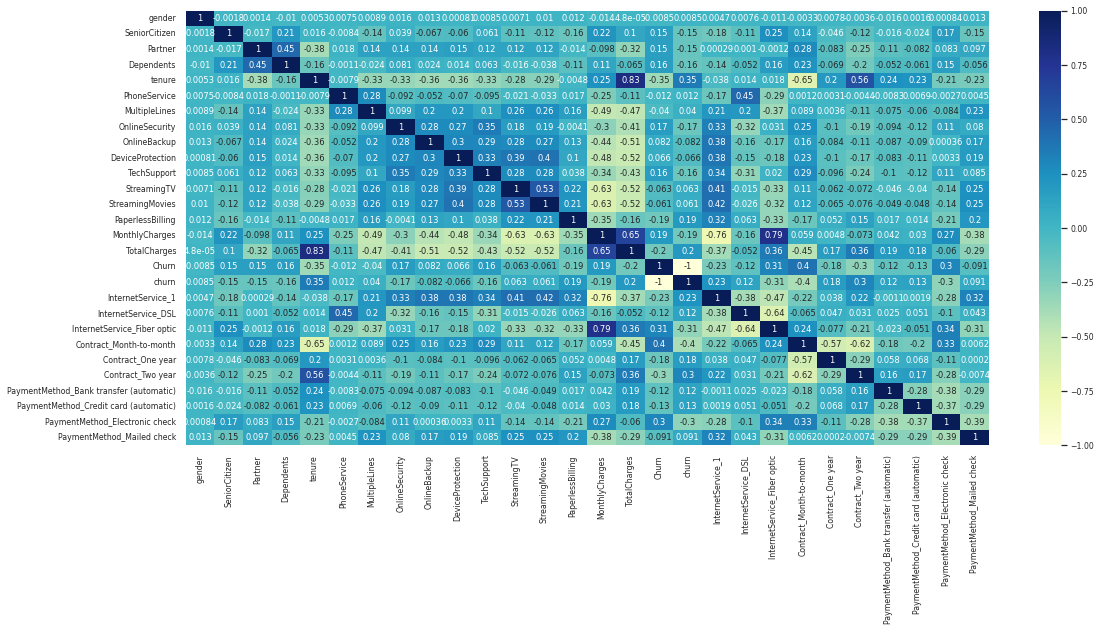

In [39]:
plt.figure(figsize=(18,8))
sns.set(font_scale=0.7)
sns.heatmap(df2.corr(),annot=True,cmap='YlGnBu')

<AxesSubplot:>

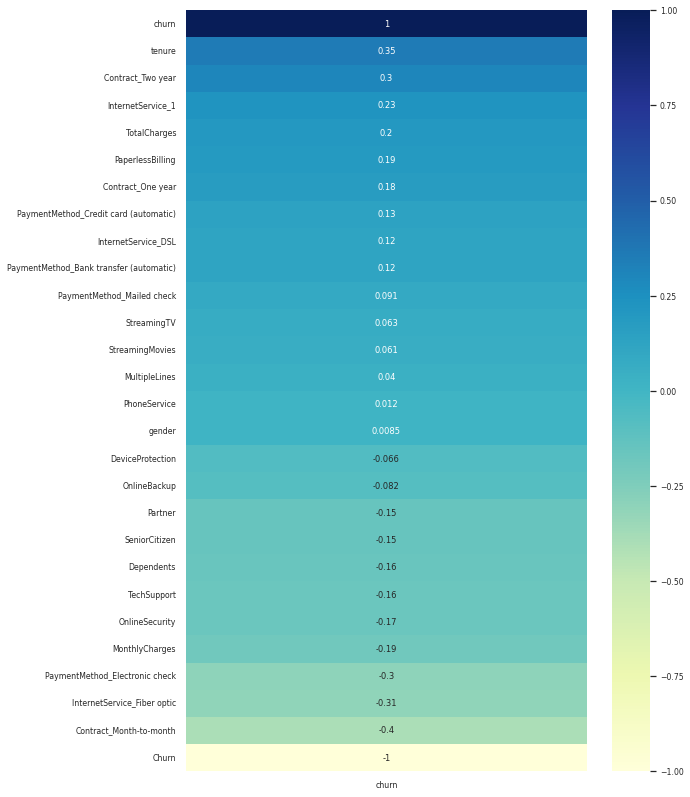

In [40]:
plt.figure(figsize=(9,14))
sns.heatmap(df2.corr()[['churn']].sort_values(by='churn',ascending=False),vmin=-1,vmax=1,annot=True,cmap='YlGnBu')

In [41]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
df3 = df2.drop(['churn','SeniorCitizen','Dependents'],axis=1)
df3.columns

Index(['gender', 'Partner', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
x = df3.drop('Churn',axis='columns')
y = df3.Churn

In [44]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [46]:
print('x train: ',len(x_train))
print('x test: ',len(x_test))
print('Y train: ',len(y_train))
print('y test: ',len(y_test))

x train:  5625
x test:  1407
Y train:  5625
y test:  1407


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,max_depth=10,subsample=0.75,random_state=1)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7782515991471215

In [105]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)
print(log_clf.score(x_test,y_test))
print(log_clf.score(x_train,y_train))

0.7945984363894811
0.8078222222222222


In [101]:
log_pred = log_clf.predict(x_test)
log_pred[:5]

array([0, 0, 0, 1, 1])

In [104]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.57      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(63.5, 0.5, 'Truth')

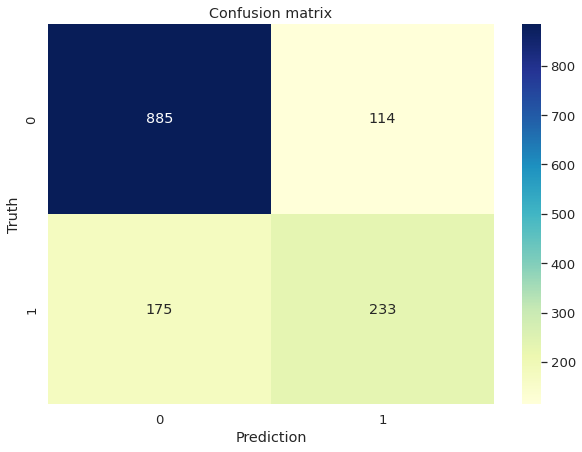

In [106]:
con_mat = tf.math.confusion_matrix(labels=y_test,predictions=log_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(con_mat,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [50]:
crossvalidation = KFold(n_splits=5,shuffle=True,random_state=1)
parameters = {'n_estimators':[500,1000,2000],'learning_rate':[0.01,0.1,0.5],'max_depth':[1,5,10],
              'subsample':[0.5,0.75,1],'random_state':[1]}
search = GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [55]:
search 

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=10,
                                                  n_estimators=500,
                                                  random_state=1,
                                                  subsample=0.75),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [1, 5, 10],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

In [52]:
#search.fit(x_train,y_train)

In [53]:
#print(search.best_params_)
#print(search.best_score_)

In [56]:
df3.shape

(7032, 25)

In [2]:
import tensorflow as tf
from tensorflow import keras

In [71]:
model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(24,),activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.7612
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8030
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accura

In [72]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 6ms/step - loss: 0.4458 - accuracy: 0.7910


[0.4457910656929016, 0.7910447716712952]

In [84]:
yp = model.predict(x_test)
yp[:10]

44/44 [==============================] - 0s 6ms/step


array([[0.2688906 ],
       [0.48193893],
       [0.00866283],
       [0.8057569 ],
       [0.41310996],
       [0.80263895],
       [0.04533324],
       [0.4918141 ],
       [0.37830788],
       [0.56605744]], dtype=float32)

In [83]:
y_test.head()

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [80]:
y_pred = []
for i in yp:
  if i < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [85]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

In [86]:
y_test.head(10)

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.53      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(63.5, 0.5, 'Truth')

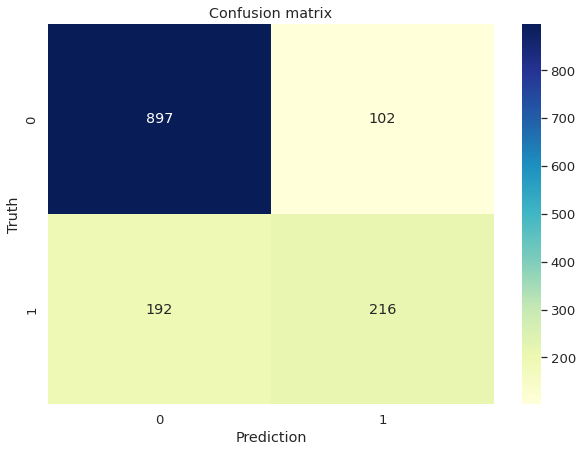

In [96]:
con_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(con_mat,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')